# HW04_API

In [1]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
%matplotlib inline

In [2]:
load_dotenv()

True

# Part 1- Personal Finance Planner

In [3]:
monthly_income = 12000

## Collecting Cypto Price Using the requests Library

In [4]:
my_btc = 1.2
my_eth = 5.3

#### Pull Bitcoin and Ethereum price using GET Method

In [5]:
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"
btc_data = requests.get(btc_url)
eth_data = requests.get(eth_url)

In [6]:
btc_details = btc_data.json()
eth_details = eth_data.json()

In [7]:
print(json.dumps(btc_details, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18496556,
            "total_supply": 18496556,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 10465.28,
                    "volume_24h": 23535226178,
                    "market_cap": 193668942587,
                    "percentage_change_1h": -0.0460965767447331,
                    "percentage_change_24h": -4.52935678922569,
                    "percentage_change_7d": -1.83670756137136,
                    "percent_change_1h": -0.0460965767447331,
                    "percent_change_24h": -4.52935678922569,
                    "percent_change_7d": -1.83670756137136
                }
            },
            "last_updated": 1600749796
        }
    },
    "metadata": {
        "timestamp": 1600749796,
        "nu

#### Filtering "Price" of Bitcoin from JSON message

In [8]:
btc_price = btc_details['data']["1"]["quotes"]["USD"]["price"]
print(f"Current Bitcoin Price:{btc_price}")

Current Bitcoin Price:10465.28


In [9]:
print(json.dumps(eth_details, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 112702762,
            "total_supply": 112702762,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 345.03,
                    "volume_24h": 15191919458,
                    "market_cap": 38951575341,
                    "percentage_change_1h": 0.240131096691892,
                    "percentage_change_24h": -7.80349080720954,
                    "percentage_change_7d": -8.33226323025173,
                    "percent_change_1h": 0.240131096691892,
                    "percent_change_24h": -7.80349080720954,
                    "percent_change_7d": -8.33226323025173
                }
            },
            "last_updated": 1600749687
        }
    },
    "metadata": {
        "timestamp": 1600749687,
        "num_cr

#### Filtering "Price" of Etherenum from JSON message

In [10]:
eth_price = eth_details['data']["1027"]["quotes"]["USD"]["price"]
print(f"Current Ethereum Price:{eth_price}")

Current Ethereum Price:345.03


#### Calculating current value of BTC and ETH using derived Price

In [11]:
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
my_crypto_value = my_btc_value + my_eth_value
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $12558.34
The current value of your 5.3 ETH is $1828.66


In [12]:
my_agg = 200
my_spy = 50

In [13]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [14]:
# Set the ticker
ticker = ["SPY","AGG"]

In [15]:
# Set timeframe to '1D'
timeframe = "1D"

In [16]:
today= pd.Timestamp("2020-09-18", tz="America/New_York").isoformat()

# Get 5 years worth of historical data for SPY,AGG
ticker_data = api.get_barset(
    ticker,
    timeframe,
    start=today,
    end=today
).df

ticker_data.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2020-09-18 00:00:00-04:00  118.39  118.44  118.18  118.24  4548578  335.37   

                                                             
                             high     low   close    volume  
time                                                         
2020-09-18 00:00:00-04:00  335.49  327.97  330.69  88780313

In [17]:
spy_close_price = float(ticker_data["SPY"]["close"])
agg_close_price = float(ticker_data["AGG"]["close"])
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.24
Current SPY closing price: $330.69


In [18]:
my_spy_value = spy_close_price*my_spy
my_agg_value = agg_close_price*my_agg
my_shares_value = my_spy_value + my_agg_value
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16534.50
The current value of your 200 AGG shares is $23648.00


## Saving Health Analysis

In [19]:
savings_data = {
    "":["Shares","Crypto"],
    "Amount":[my_shares_value,my_crypto_value]    
}

my_savings = pd.DataFrame(savings_data)
my_savings
my_savings.set_index(my_savings[''],inplace=True)


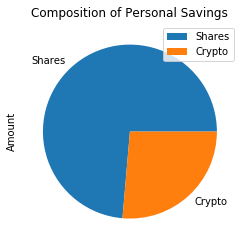

In [20]:
my_savings.plot.pie(y="Amount", title="Composition of Personal Savings")

In [21]:
emergency_fund = monthly_income*3
current_savings = my_savings['Amount'].sum()
if current_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
else:
    print("You have to Work Hard")


Congratulations! You have enough money in your emergency fund.


# Part 2 - Retirement Planning

## Monte Carlo Simulation

In [97]:
# Set start and end datetimes of 5 years 

start_date = pd.Timestamp("2015-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

# Get 5 years worth of historical data for SPY,AGG
ticker_data = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

ticker_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
time                                                          
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

##  Thirty Years Retirement Option

In [98]:
# Configure a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = 1000,
    num_trading_days = 252*30
)

# Print the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [99]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999795,0.994923,1.003642,1.003242,1.002070,1.001592,0.994918,0.998710,1.006392,1.001746,...,1.002023,1.002837,1.003120,0.988589,0.992350,0.990646,0.996947,1.002211,1.008940,1.001212
2,1.006561,0.992937,1.011136,0.999687,0.997240,1.004190,0.982404,0.999032,1.001629,1.008820,...,0.994007,1.001359,0.991682,0.993001,0.988371,0.991566,0.994795,0.992586,0.994919,1.007521
3,1.009855,0.985661,1.017095,0.999318,0.998710,0.997445,0.975890,1.009810,1.010530,0.986373,...,1.001979,0.976257,0.994205,0.995108,0.997465,0.977855,0.990625,1.000925,1.003441,1.007463
4,1.015211,0.997586,1.023983,1.000859,1.001331,1.003158,0.980141,1.006419,1.011147,0.996610,...,0.998843,0.985310,0.999396,0.999195,1.006294,0.970489,0.990714,0.997516,1.006455,0.999271
5,1.010901,1.007442,1.021485,0.995177,0.997158,1.010086,0.975838,1.002652,1.006698,0.998252,...,1.012331,0.979480,1.003141,0.991096,1.018995,0.973071,0.989649,0.993113,1.006286,0.998300
6,1.022285,1.014122,1.020927,0.998745,0.995828,1.012008,0.980133,0.996940,0.991451,1.007780,...,1.013845,0.987163,1.014739,0.996969,1.013821,0.966167,0.998486,0.987534,1.002072,1.007148
7,1.017241,1.012257,1.022525,0.997785,0.983866,1.017363,0.980073,0.995260,1.000412,1.009158,...,1.015755,0.976422,1.011417,0.986440,1.008792,0.960390,0.998555,0.998785,1.007476,1.016710
8,1.020503,1.004731,1.025448,0.999006,0.986147,1.007715,0.974669,0.984277,1.003813,1.006410,...,1.005511,0.976199,1.010729,0.983970,1.012009,0.961599,0.983122,0.989782,1.012675,1.016110
9,1.012789,1.005224,1.027141,0.998048,0.992631,1.010276,0.963489,0.990355,1.013515,1.000339,...,1.006684,0.971018,1.007945,0.986441,1.022102,0.959201,0.991513,0.988785,1.012619,1.012123


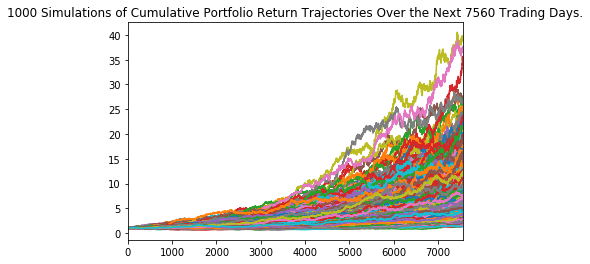

In [100]:
line_plot = MC_even_dist.plot_simulation()

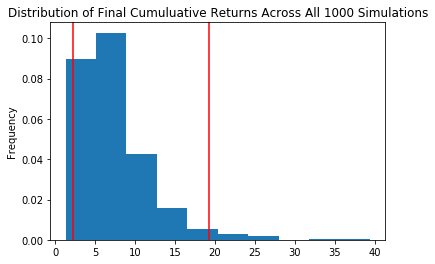

In [101]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [102]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean               7.436153
std                4.507398
min                1.279859
25%                4.467566
50%                6.361663
75%                9.320976
max               39.412683
95% CI Lower       2.234770
95% CI Upper      19.303074
Name: 7560, dtype: float64


***Calcuting the Returns***

In [111]:
#Set initial Investment
Initial_investment=20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000 
even_ci_lower = round(even_tbl[8]*Initial_investment,2)
even_ci_upper = round(even_tbl[9]*Initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of {Initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of 20000 in the portfolio over the next 30 years will end within in the range of $44695.39 and $386061.49.


In [112]:
#Set initial Investment
Initial_investment=20000*1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000 
even_ci_lower = round(even_tbl[8]*Initial_investment,2)
even_ci_upper = round(even_tbl[9]*Initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of {Initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of 30000.0 in the portfolio over the next 30 years will end within in the range of $67043.09 and $579092.23.


## Five Years Retirement Option

In [115]:
# Configure a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yrs_even_dist = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Print the simulation input data
MC_5yrs_even_dist.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [116]:
MC_5yrs_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007737,1.001142,1.003785,0.989670,0.995719,0.996385,1.001187,0.998178,0.996225,0.998470,...,1.012300,0.997977,1.004045,0.999615,1.000397,0.994193,0.995857,0.999854,1.006251,1.011673
2,1.016470,1.001020,1.012962,0.990962,0.989091,0.996069,0.991035,1.008776,0.992468,0.991139,...,1.007512,0.997538,1.007007,1.007647,1.005282,0.986691,0.993868,1.001024,1.004085,1.011322
3,1.025603,1.005454,1.010756,0.985717,0.984181,0.998355,0.982905,1.012654,0.992736,1.000404,...,0.993328,1.007520,1.011567,1.005238,1.003530,0.995380,0.993701,1.001549,1.007069,1.017667
4,1.022209,1.002667,1.009608,0.985611,0.981676,1.000632,0.991275,1.010083,0.999665,1.004049,...,1.002862,1.014263,1.005001,1.007173,1.005586,1.003422,0.996035,1.005327,1.006023,1.021251
5,1.016058,1.000678,1.008524,0.986097,0.979015,1.002047,0.994325,1.012802,1.000289,1.000589,...,1.014177,1.006529,0.999533,0.998508,1.009407,1.000768,0.997544,1.010725,1.013323,1.033692
6,1.008234,1.004133,1.001467,0.980483,0.981289,0.998544,0.987787,1.027082,0.992075,1.007594,...,1.017256,1.000837,0.995286,1.009756,1.008561,1.003405,0.993264,1.004996,1.016312,1.039765
7,1.013682,0.990076,1.004592,0.985102,0.984484,1.008784,0.981945,1.029116,0.979259,1.014785,...,1.022845,1.007979,0.993905,1.006374,1.008527,0.995128,0.981622,1.007498,1.017973,1.043553
8,1.020429,0.989253,1.016551,0.982803,0.988619,1.018305,0.985055,1.024042,0.978420,1.016430,...,1.027903,1.005683,0.997256,0.990810,1.002101,0.987534,0.985028,0.996338,1.019571,1.045761
9,1.012202,0.983552,1.016843,0.970782,0.984747,1.033127,0.977934,1.037732,0.983043,1.027963,...,1.033220,1.005198,1.003700,0.985364,0.989937,0.981140,0.982351,1.009368,1.023478,1.034556


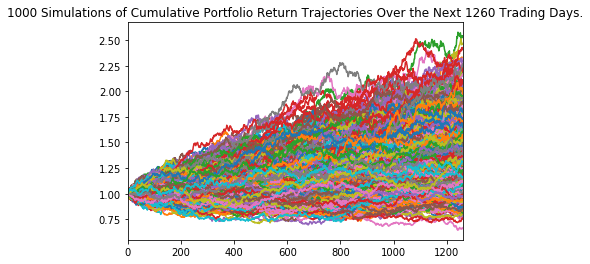

In [117]:
line_plot = MC_5yrs_even_dist.plot_simulation()

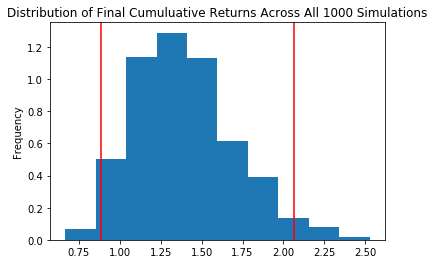

In [118]:
dist_plot = MC_5yrs_even_dist.plot_distribution()

In [119]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_5yrs_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean               1.393358
std                0.304872
min                0.665894
25%                1.175913
50%                1.363873
75%                1.567201
max                2.526846
95% CI Lower       0.887555
95% CI Upper       2.064134
Name: 1260, dtype: float64


In [122]:
#Set initial Investment
Initial_investment=60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000 
even_ci_lower = round(even_tbl[8]*Initial_investment,2)
even_ci_upper = round(even_tbl[9]*Initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of {Initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of 60000 in the portfolio over the next 5 years will end within in the range of $53253.31 and $123848.02.


##  Ten Years Retirement Option

In [123]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yrs_even_dist = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = 1000,
    num_trading_days = 252*10
)

# Print the simulation input data
MC_10yrs_even_dist.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [124]:
MC_10yrs_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997023,1.006095,1.001467,0.990127,1.008890,1.002426,1.004913,1.013809,0.985823,1.002101,...,1.000029,0.988283,1.013458,1.002422,0.993804,1.014018,0.997548,0.990632,1.003630,1.003965
2,0.991687,1.010803,0.997492,0.989830,1.010185,0.992393,1.008788,1.010596,0.988054,1.000781,...,0.991396,0.981158,1.012143,0.988369,1.005225,1.014668,1.000611,0.986974,1.006187,1.004073
3,0.989967,1.018988,1.000222,0.987552,1.013631,1.006013,1.005967,1.011685,0.993480,0.995867,...,0.996094,0.980326,1.013806,0.989510,0.998444,1.019112,0.999376,0.988911,1.003827,0.999287
4,0.985994,1.010041,1.010908,0.987316,1.016654,0.999224,1.000104,1.008192,0.993056,0.993739,...,1.019588,0.985387,1.003312,0.985576,0.995062,1.022791,1.004070,0.986014,1.005709,0.987895
5,0.990886,1.023530,1.021131,0.983654,1.015513,0.998878,0.996797,1.011165,0.990572,0.998719,...,1.023908,0.987670,1.002913,0.975491,0.993030,1.012978,1.004283,0.988471,1.000049,0.989944
6,0.992803,1.020465,1.016595,0.978699,1.028060,1.001222,1.006679,1.008661,0.986346,0.995195,...,1.024939,0.989655,1.007359,0.966959,0.998450,1.000331,0.997744,0.978597,1.003397,0.989812
7,0.996024,1.012441,1.016264,0.977594,1.022885,0.999044,1.015356,1.013075,0.982835,0.999650,...,1.028990,0.989491,1.019955,0.975095,1.007099,1.009882,1.003540,0.979130,1.006389,0.982931
8,0.986447,1.008422,1.019600,0.976228,1.014021,1.006347,1.019829,1.005505,0.980726,1.002936,...,1.023888,0.986775,1.023170,0.962901,1.008604,1.007350,1.009720,0.979763,1.005547,0.986734
9,0.981901,1.018121,1.014644,0.991513,1.012682,1.013053,1.029661,1.009686,0.978229,1.003645,...,1.021968,0.986951,1.024701,0.955610,0.999849,1.001373,1.006067,0.975654,0.999446,0.992717


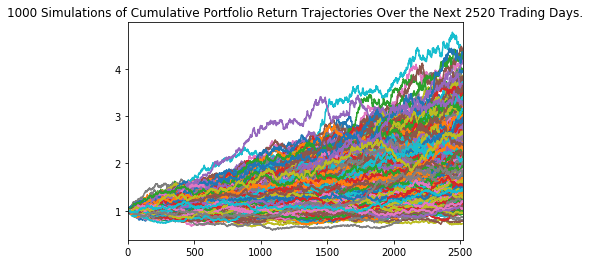

In [125]:
line_plot = MC_10yrs_even_dist.plot_simulation()

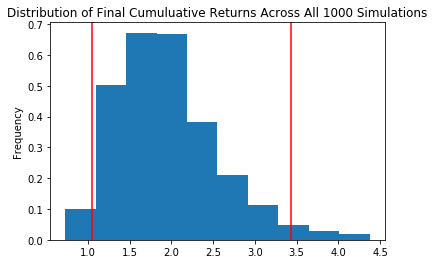

In [126]:
dist_plot = MC_10yrs_even_dist.plot_distribution()

In [127]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_10yrs_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean               1.948651
std                0.609860
min                0.729192
25%                1.520696
50%                1.872226
75%                2.259571
max                4.374537
95% CI Lower       1.048608
95% CI Upper       3.427624
Name: 2520, dtype: float64


In [128]:
#Set initial Investment
Initial_investment=60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000 
even_ci_lower = round(even_tbl[8]*Initial_investment,2)
even_ci_upper = round(even_tbl[9]*Initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of {Initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of 60000 in the portfolio over the next 5 years will end within in the range of $62916.47 and $205657.45.
